## 2015 Flights Dataset EDA with Pandas

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [57]:
path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
flights_path = path + 'flights.csv'
flights = pd.read_csv(flights_path)
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [58]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     57474 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


## Add some features
Calculate the number of diverted, cancelled, delayed,
and ontime flights. We already have binary columns for diverted and cancelled.
Flights are considered delayed whenever they arrive 15 minutes or more later
than scheduled. Let's create two new binary columns to track delayed and ontime arrivals

In [59]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
#both lines of code achieve same result
#flights['DELAYED'] = (flights['ARR_DELAY']>=15.0).astype(int)

In [60]:
cols = ['DIVERTED','CANCELLED','DELAYED']
#for any of the columns
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

In [61]:
flights[cols].any(axis=1)[:5]

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [62]:
cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

## Univarate Plots
The most popular univariate plots tend to be bar charts for categorical data (usually strings) and histograms,
boxplots, or KDEs for continuous data (always numeric)

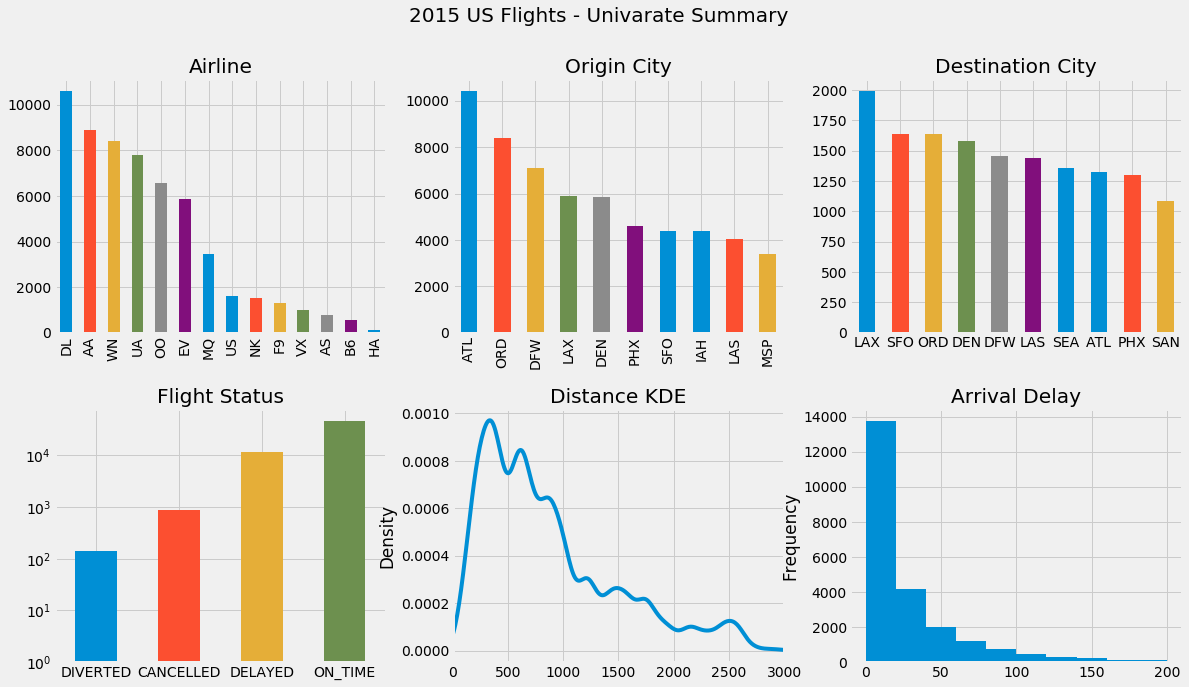

In [88]:
fig,ax_array = plt.subplots(2,3,figsize=(18,10))
fig.subplots_adjust(hspace=0.3)
#fig.tight_layout()
(ax1,ax2,ax3),(ax4,ax5,ax6) = ax_array
fig.suptitle('2015 US Flights - Univarate Summary',size=20)

ac=flights['AIRLINE'].value_counts()
ac.plot(kind='bar',ax=ax1,title='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar',ax=ax2,title='Origin City');

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar',ax=ax4,rot=0,log=True,title='Flight Status')

flights['DIST'].plot(kind='kde',ax=ax5,xlim=(0,3000),title='Distance KDE')

flights['ARR_DELAY'].plot(kind='hist', ax=ax6,title='Arrival Delay',range=(0,200));

In [64]:
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

### Flights per week
Don't have pandas
Timestamps in any of the columns, but we do have the month and day. The
to_datetime function has a nifty trick that identifies column names that match
Timestamp components. 

For instance, if you have a DataFrame with exactly three
columns titled year, month, and day, then passing this DataFrame to the
to_datetime function will return a sequence of Timestamps. 

To prepare our
current DataFrame, we need to add a column for the year and use the scheduled
departure time to get the hour and minute

In [97]:
#24hour clock
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH','DAY']].assign(YEAR=2015,HOUR=hour,MINUTE=minute)

In [98]:
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [100]:
#can now turn this data into timestamps
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

In [103]:
#use the results as new index of original dataframe
flights.head(2)

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,DELAYED,ON_TIME
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1


In [104]:
flights.index = flight_dep
flights.head(2)

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,DELAYED,ON_TIME
2015-01-01 16:25:00,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
2015-01-01 08:23:00,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1


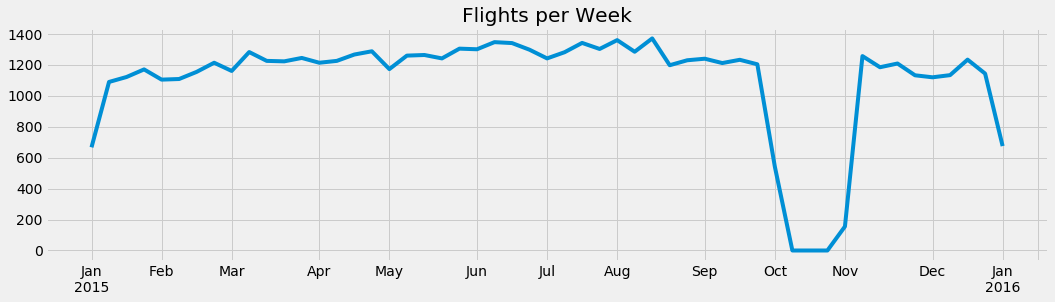

In [112]:
fc = flights.resample('W').size()
fc.plot(figsize=(16,4),title='Flights per Week',grid=True);

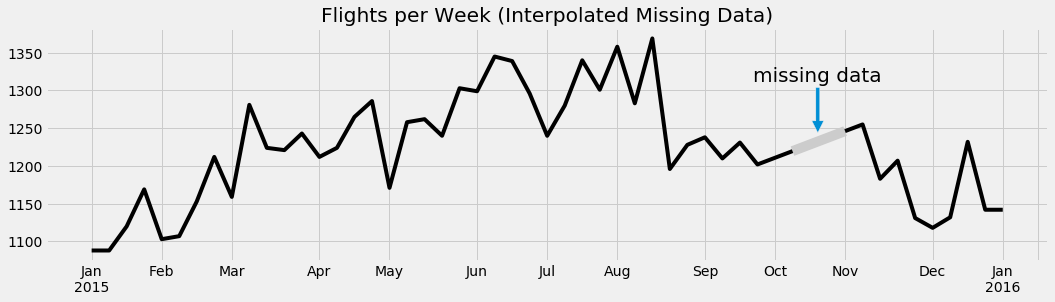

In [128]:
#Missings data for October and start/finish for the year Let's make any week of data with fewer than 1,000 flights missing.
#Then, we can use the interpolate method to fill in this missing data:
fc_miss = fc.where(fc>1000)
fc_intp = fc_miss.interpolate(limit_direction='both')
ax = fc_intp.plot(color='black',figsize=(16,4))

fc_intp[fc < 500].plot(linewidth=10, grid=True,color='.8', ax=ax)

ax.annotate(xy=(.77, .55), xytext=(.77, .77),xycoords='axes fraction', s='missing data',ha='center', size=20, 
            arrowprops=dict());
ax.set_title('Flights per Week (Interpolated Missing Data)');

In [116]:
fc_intp[fc<500]

2015-10-11    1219.666667
2015-10-18    1228.500000
2015-10-25    1237.333333
2015-11-01    1246.166667
Freq: W-SUN, dtype: float64

## Multivarate Plots
Find the 10 airports that:
- Have the longest average distance traveled for inbound flights
- Have a minimum of 100 total flights:

In [141]:
result = flights.groupby('DEST_AIR')['DIST'].agg(['mean','count']).query('count>100').sort_values('mean').tail(10)
print(result)

                 mean  count
DEST_AIR                    
FLL       1261.114875    679
PHL       1324.490153    914
MIA       1349.589552    670
IAD       1564.146865    606
BOS       1631.797669    944
EWR       1668.000000    921
SJU       1859.436090    133
JFK       2175.904192   1002
OGG       2661.431818    176
HNL       2851.915452    343


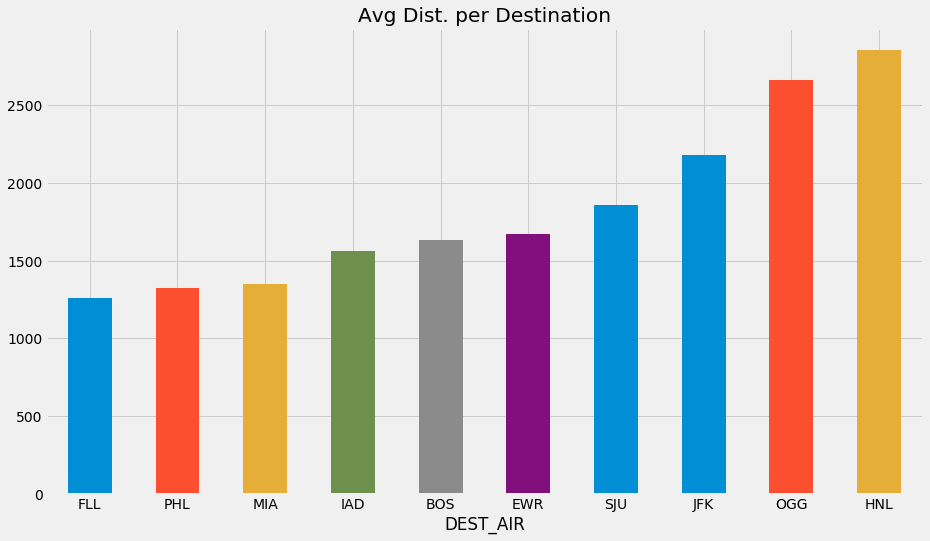

In [145]:
result.plot(kind='bar',y='mean',rot=0,legend=False,title='Avg Dist. per Destination',figsize=(14,8));

### Scatter plot
- distance and airtime for all flights under 2,000 miles

In [146]:
fs = flights.reset_index(drop=True)[['DIST','AIR_TIME']].query('DIST <=2000').dropna()

In [148]:
fs.head()

,DIST,AIR_TIME
0,590,94.0
1,1452,154.0
2,641,85.0
3,1192,126.0
4,1363,166.0


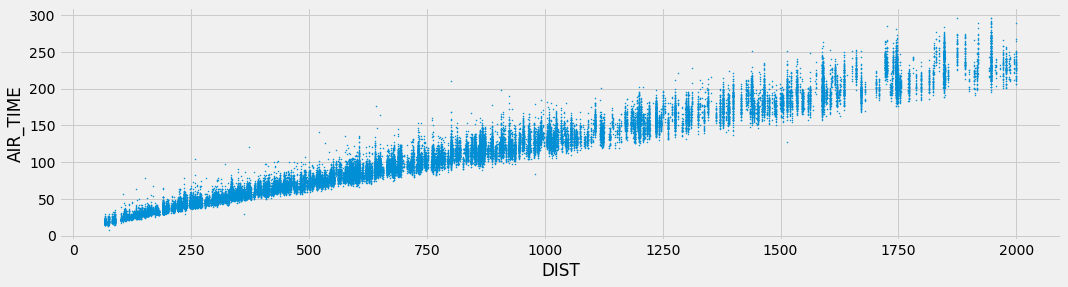

In [150]:
fs.plot(x='DIST',y='AIR_TIME',kind='scatter',s=1,figsize=(16,4));

Linear relationship exists between distance and airtime,
though the variance seems to increase as the number of miles increases. There are
a few flights that are quite far outside the trendline.

A linear regression model may be used to formally identify them, but as pandas
doesn't directly support linear regression, we will take a more manual approach.
Let's use the cut function to place the flight distances into one of eight groups:

In [152]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'],bins=range(0,2001,250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

Assume that all flights within each group should have similar flight
times, and thus calculate for each flight the number of standard deviations if the
flight time deviates from the mean of that group:

In [154]:
fs.head()

,DIST,AIR_TIME,DIST_GROUP
0,590,94.0,"(500, 750]"
1,1452,154.0,"(1250, 1500]"
2,641,85.0,"(500, 750]"
3,1192,126.0,"(1000, 1250]"
4,1363,166.0,"(1250, 1500]"


In [155]:
norm = lambda x:(x-x.mean())/x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'].transform(norm)

In [156]:
fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


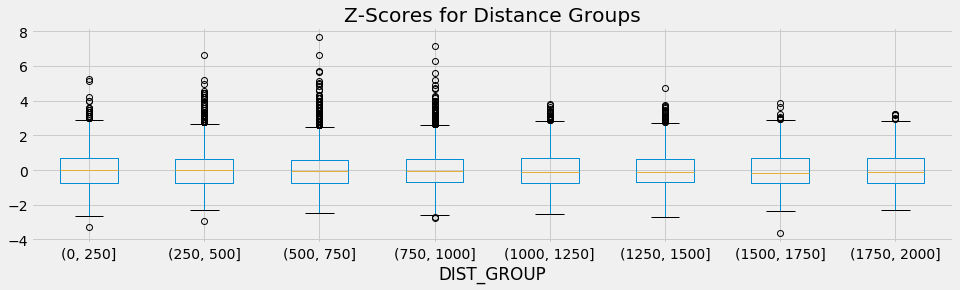

In [160]:
#look at the outliers
ax = fs.boxplot(by='DIST_GROUP',column='TIME_SCORE',figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('');

Points that are greater than six standard
deviations away from the mean. Because we reset the index in the fs DataFrame we can use it to identify each unique row in the flights DataFrame. 

In [167]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR','AIR_TIME','DIST', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,176.0,643,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,164.0,651,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,210.0,802,98.0,0,5


Text(0.5,1,'Flight Time vs Distance with Outliers')

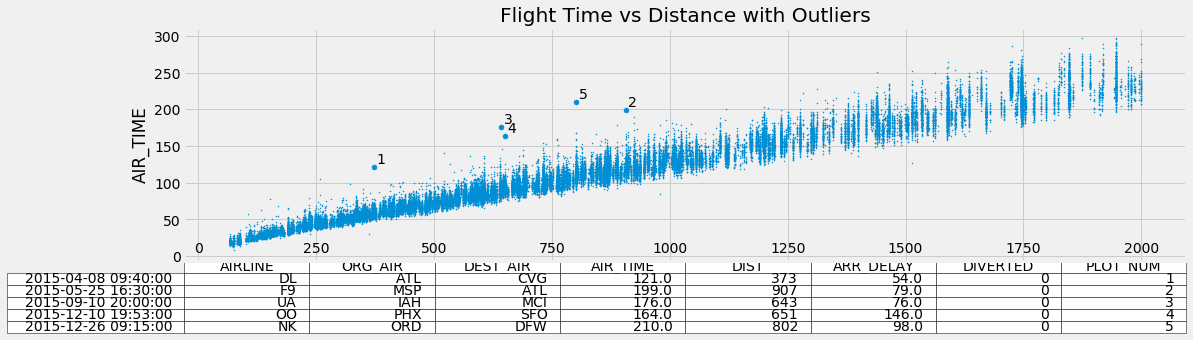

In [168]:
ax = fs.plot(x='DIST', y='AIR_TIME',kind='scatter', s=1,figsize=(16,4), table=outliers)
outliers.plot(x='DIST', y='AIR_TIME',kind='scatter', s=25, ax=ax, grid=True)
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

In [166]:
fs.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            58481, 58482, 58484, 58485, 58486, 58487, 58488, 58489, 58490,
            58491],
           dtype='int64', length=53467)